In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="ZG3cEbr9iEpQh7CLsODb")
# project = rf.workspace("computer-vision-xiyu1").project("coral-life-forms-detection")
# dataset = project.version(3).download("yolov5")

In [ ]:
!curl -L "https://universe.roboflow.com/ds/KrYQFFvBBW?key=YRHzW58iRz" > roboflow.zip && unzip roboflow.zip && rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0   3678      0 --:--:-- --:--:-- --:--:--  3681
100 35.5M  100 35.5M    0     0  37.9M      0 --:--:-- --:--:-- --:--:--  100M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/LINIFoundation-ABZU-coralforms-latc-11_jpg.rf.a917bf401fd732b05242c05c6f4d3748.jpg  
 extracting: test/images/LINIFoundation-ABZU-coralforms-latc-19_jpg.rf.b31fc83f63b99e69aba6c202126d604d.jpg  
 extracting: test/images/LINIFoundation-ABZU-coralforms-latc-2_jpg.rf.a3c606862103a2f2ed4bfbf4852d4b73.jpg  
 extracting: test/images/LINIFoundation-ABZU-coralforms-latc-30_jpg.rf.12e966ad24abe05080a7bb1a6fe472a6.jpg  
 extracting: test/images/LINIFoundation-ABZU-coralforms-latc-31

In [ ]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv3n model
model_yolov3 = YOLO('yolov3.pt')

# Display model information (optional)
model_yolov3.info()

PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:01<00:00, 184MB/s]


YOLOv3 summary: 310 layers, 103754144 parameters, 0 gradients, 283.3 GFLOPs


(310, 103754144, 0, 283.3201664)

In [ ]:
# Train the model on the COCO8 example dataset for 100 epochs
results_yolov3 = model_yolov3.train(data='/content/data.yaml', epochs=100, imgsz=640, batch=4)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=/content/data.yaml, epochs=100, time=None, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 791/791 [00:00<00:00, 1902.09it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 1448.29it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.04G      1.452      2.402      1.555         36        640: 100%|██████████| 198/198 [01:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all         33        316      0.557       0.29      0.353      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.06G      1.397      1.967      1.531         47        640: 100%|██████████| 198/198 [01:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.26it/s]

                   all         33        316      0.457      0.402      0.412      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.08G      1.393      1.886      1.503         62        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all         33        316      0.331      0.499       0.37      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.07G      1.404      1.863      1.504         70        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

                   all         33        316      0.559       0.48      0.509      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.05G       1.31      1.656      1.432         52        640: 100%|██████████| 198/198 [01:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]

                   all         33        316      0.677      0.545      0.612      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.05G      1.293      1.588      1.416         73        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.28it/s]

                   all         33        316      0.782      0.388      0.536       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.06G      1.264      1.557      1.413         30        640: 100%|██████████| 198/198 [01:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.29it/s]

                   all         33        316       0.61      0.574      0.619      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.04G      1.223      1.414       1.38         52        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.40it/s]

                   all         33        316      0.616       0.57      0.637      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.06G      1.201      1.367      1.377         35        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.31it/s]

                   all         33        316      0.627      0.571        0.6      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.05G      1.144      1.264      1.329         33        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]

                   all         33        316      0.621      0.599      0.661      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.05G      1.163      1.261      1.327         34        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.45it/s]

                   all         33        316      0.706      0.627      0.661      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.05G      1.137      1.235      1.317         39        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.43it/s]

                   all         33        316      0.776      0.504      0.651       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.05G      1.102      1.136        1.3         35        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

                   all         33        316      0.625        0.6      0.639      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.06G      1.078      1.109      1.263         47        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]

                   all         33        316      0.689      0.597      0.672       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.05G      1.085      1.109      1.264         69        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]

                   all         33        316      0.699      0.598      0.686      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.01G      1.034      1.069      1.256         54        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.49it/s]

                   all         33        316      0.653      0.552      0.636      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.03G      1.012     0.9793      1.213         48        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]

                   all         33        316      0.642      0.646      0.675      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.08G      1.015      1.006       1.24         69        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.31it/s]

                   all         33        316       0.62      0.697      0.702      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.09G     0.9823     0.9239      1.216         42        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.39it/s]

                   all         33        316      0.714       0.64      0.693      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.06G     0.9825     0.9416      1.222         24        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.39it/s]

                   all         33        316       0.71      0.682      0.686      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.07G     0.9625     0.9003      1.199         25        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]

                   all         33        316      0.714       0.64        0.7       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.09G     0.9479     0.8864      1.195         42        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.30it/s]

                   all         33        316      0.741      0.674      0.708      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.05G     0.9554     0.8882      1.192         42        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.14it/s]

                   all         33        316       0.81      0.639      0.752      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.06G     0.9223     0.8461      1.177         48        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.32it/s]

                   all         33        316      0.818      0.689      0.749      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.13G     0.9192     0.8177      1.166         71        640: 100%|██████████| 198/198 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.44it/s]

                   all         33        316      0.758      0.658      0.708      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.08G     0.8634     0.7412      1.127         66        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.45it/s]

                   all         33        316      0.774      0.666      0.728      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.06G     0.8777     0.7737      1.145         38        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.64it/s]

                   all         33        316      0.756      0.683      0.733      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.14G     0.8501      0.709      1.118         33        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.61it/s]

                   all         33        316       0.75      0.677      0.701      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.04G     0.8551     0.7422      1.131         50        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.53it/s]

                   all         33        316      0.766      0.657       0.72      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.04G     0.8418     0.7074       1.12         26        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.55it/s]

                   all         33        316       0.72      0.662      0.718      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.04G      0.843     0.7111       1.13         72        640: 100%|██████████| 198/198 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.42it/s]

                   all         33        316      0.733      0.611      0.698      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.04G     0.8324     0.6987      1.103         23        640: 100%|██████████| 198/198 [01:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.55it/s]

                   all         33        316      0.735      0.602      0.704      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.05G     0.8222     0.6739      1.112         43        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.34it/s]

                   all         33        316      0.755      0.643      0.708      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.03G     0.8117     0.6461      1.096         47        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.40it/s]

                   all         33        316       0.78      0.579      0.704      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.05G     0.7918     0.6285      1.088         41        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.56it/s]

                   all         33        316      0.735      0.672      0.727      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.13G     0.7792     0.6174      1.082         45        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.91it/s]

                   all         33        316      0.778      0.627      0.709      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.05G      0.773     0.6074      1.072         58        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.68it/s]


                   all         33        316      0.746      0.678      0.726      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.05G      0.767     0.6149      1.077         41        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.45it/s]

                   all         33        316      0.757      0.674      0.739      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.04G     0.7893      0.652      1.091         50        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.66it/s]

                   all         33        316      0.749      0.687      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.05G     0.7406     0.5759      1.059         71        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.06it/s]

                   all         33        316      0.739      0.675      0.734      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.09G     0.7508     0.5881      1.063         45        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.48it/s]

                   all         33        316      0.805      0.633      0.736      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.08G     0.7497     0.5871      1.054         53        640: 100%|██████████| 198/198 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.33it/s]

                   all         33        316      0.714      0.649      0.729      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.08G     0.7412     0.5723      1.058         34        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.47it/s]

                   all         33        316      0.796      0.637      0.729      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.05G     0.7494     0.5866      1.066         56        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.57it/s]

                   all         33        316      0.758      0.665      0.739      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.09G     0.7116     0.5506      1.044         70        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.46it/s]

                   all         33        316      0.748      0.621      0.713      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.06G     0.6972     0.5455      1.032         47        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.48it/s]

                   all         33        316      0.802      0.628      0.722      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.02G     0.7217     0.5687      1.038         22        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.54it/s]

                   all         33        316      0.788      0.647      0.714      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.05G     0.6918     0.5276      1.028         50        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.71it/s]

                   all         33        316      0.786      0.614      0.712      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.06G      0.695     0.5248      1.027         38        640: 100%|██████████| 198/198 [01:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.52it/s]

                   all         33        316       0.78      0.703      0.746      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.06G     0.6945     0.5206      1.033         66        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.59it/s]

                   all         33        316      0.698      0.704      0.728       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.04G     0.6891     0.5122       1.03         40        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.48it/s]

                   all         33        316      0.711      0.669      0.739      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.05G     0.6933     0.5232       1.03         44        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.67it/s]

                   all         33        316      0.738      0.666      0.713      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.05G     0.6627     0.4841      1.015         42        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.39it/s]

                   all         33        316      0.772      0.623      0.693      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.04G     0.6596     0.4892      1.008         65        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.72it/s]

                   all         33        316      0.787      0.647      0.717      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.04G     0.6759     0.5127      1.017         37        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         33        316      0.781      0.612      0.715      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.13G      0.654     0.4832      1.002         38        640: 100%|██████████| 198/198 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

                   all         33        316      0.745      0.692      0.726       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.06G     0.6332     0.4539     0.9925        103        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.42it/s]

                   all         33        316      0.722      0.671      0.724      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.05G     0.6276     0.4536     0.9943        125        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

                   all         33        316      0.759      0.657      0.737      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.08G     0.6319     0.4596     0.9972         63        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.29it/s]

                   all         33        316      0.728      0.657      0.712      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.06G     0.6354     0.4627     0.9859         35        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.27it/s]

                   all         33        316      0.778      0.658      0.729      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.06G     0.6203     0.4393     0.9775         79        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.58it/s]

                   all         33        316      0.705      0.656      0.711      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.05G     0.6156     0.4403     0.9756         34        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.53it/s]

                   all         33        316      0.712       0.73      0.735      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.04G     0.6033     0.4293     0.9807         27        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.60it/s]

                   all         33        316      0.754      0.645      0.712      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.12G     0.5926      0.417     0.9702         89        640: 100%|██████████| 198/198 [01:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.42it/s]

                   all         33        316      0.735      0.674       0.71      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.06G     0.6036     0.4302     0.9752         53        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]

                   all         33        316      0.748      0.655      0.723      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.08G     0.5832     0.4162     0.9714         45        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.52it/s]

                   all         33        316      0.786      0.686      0.759      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.05G      0.589      0.414     0.9713         60        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.50it/s]

                   all         33        316      0.775       0.64      0.721      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.06G     0.5815     0.4136     0.9734         25        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.22it/s]

                   all         33        316      0.732       0.66      0.737      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.04G     0.5769      0.404     0.9647         40        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.71it/s]

                   all         33        316      0.708      0.691      0.732      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.05G     0.5774     0.4011     0.9569         45        640: 100%|██████████| 198/198 [01:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.65it/s]

                   all         33        316      0.779      0.635      0.711      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.02G     0.5621     0.3922     0.9595         56        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.61it/s]

                   all         33        316      0.753      0.694      0.733      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.04G     0.5562     0.3873     0.9514         37        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.59it/s]

                   all         33        316      0.766      0.705      0.745       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.05G     0.5557     0.3908     0.9497         53        640: 100%|██████████| 198/198 [01:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]

                   all         33        316      0.781      0.704      0.731      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.06G      0.541     0.3737     0.9487         23        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.55it/s]

                   all         33        316      0.789      0.647      0.728      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.04G      0.544     0.3809     0.9426         52        640: 100%|██████████| 198/198 [01:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.42it/s]

                   all         33        316      0.763      0.674       0.72      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.06G     0.5448     0.3846      0.953        100        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         33        316      0.731       0.67      0.724      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.06G     0.5357     0.3667     0.9412         64        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.57it/s]

                   all         33        316      0.757      0.644      0.723      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.05G     0.5345     0.3751     0.9475         51        640: 100%|██████████| 198/198 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.46it/s]

                   all         33        316      0.758      0.662      0.728      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.04G     0.5181     0.3534     0.9345         76        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]

                   all         33        316      0.758      0.717      0.745      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.01G     0.5226      0.362      0.943         64        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.74it/s]


                   all         33        316      0.792      0.663       0.72      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.06G     0.5222     0.3558     0.9421         67        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.93it/s]

                   all         33        316       0.77      0.663      0.725      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.07G     0.5197     0.3491     0.9325         82        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

                   all         33        316      0.794      0.642      0.736      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.06G     0.5144      0.344     0.9345         44        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.61it/s]

                   all         33        316      0.766      0.688      0.727       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.05G     0.4999     0.3389     0.9313         50        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.45it/s]

                   all         33        316      0.786      0.655      0.733      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.04G     0.5025      0.327     0.9161         18        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.27it/s]

                   all         33        316      0.778      0.665      0.744      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.08G     0.4972     0.3285     0.9276         46        640: 100%|██████████| 198/198 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.50it/s]

                   all         33        316      0.799      0.642      0.736      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.05G     0.4919     0.3307     0.9281         43        640: 100%|██████████| 198/198 [01:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.67it/s]

                   all         33        316      0.754      0.672      0.726      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.08G     0.4802     0.3198     0.9154         64        640: 100%|██████████| 198/198 [01:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.80it/s]

                   all         33        316      0.756      0.669      0.739      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.05G     0.4776     0.3223     0.9178         55        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.37it/s]

                   all         33        316      0.762      0.686      0.727      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.08G     0.4849     0.3247       0.92         65        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.71it/s]

                   all         33        316      0.736      0.696      0.726       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.05G     0.4548     0.2788     0.8818         20        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

                   all         33        316      0.764      0.709      0.725       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.12G       0.44      0.273     0.8835         22        640: 100%|██████████| 198/198 [01:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.52it/s]

                   all         33        316      0.725      0.717      0.738      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.05G     0.4327     0.2637     0.8743         19        640: 100%|██████████| 198/198 [01:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.81it/s]


                   all         33        316      0.781       0.69      0.733      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.03G     0.4278     0.2599     0.8782         25        640: 100%|██████████| 198/198 [01:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]

                   all         33        316      0.745      0.707      0.721      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.05G     0.4201      0.248     0.8728         11        640: 100%|██████████| 198/198 [01:10<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.18it/s]

                   all         33        316      0.731      0.715      0.738      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.14G     0.4091     0.2375     0.8655         17        640: 100%|██████████| 198/198 [01:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

                   all         33        316      0.743      0.691      0.738      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.05G     0.4151     0.2542     0.8738         79        640: 100%|██████████| 198/198 [01:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.61it/s]


                   all         33        316      0.761      0.683      0.733      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.04G     0.4134       0.25     0.8713         44        640: 100%|██████████| 198/198 [01:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.63it/s]

                   all         33        316      0.784      0.664       0.74      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.04G     0.4021     0.2359     0.8627         38        640: 100%|██████████| 198/198 [01:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]

                   all         33        316      0.768      0.668      0.735      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.05G     0.4063     0.2344     0.8722         31        640: 100%|██████████| 198/198 [01:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.67it/s]

                   all         33        316      0.744      0.707      0.736       0.55



100 epochs completed in 2.155 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv3 summary (fused): 226 layers, 103669637 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


                   all         33        316      0.783      0.662       0.74      0.551
             Branching         33         93      0.862       0.72      0.826      0.582
            Encrusting         33         50       0.79       0.64      0.737      0.521
               Foliose         33         11      0.587      0.545      0.587      0.494
               Massive         33         73      0.723      0.479      0.631      0.447
              Mushroom         33         40      0.921      0.873      0.889      0.686
            Submassive         33         18      0.887      0.667      0.801      0.635
              Tabulate         33         31      0.709       0.71      0.708      0.491
Speed: 0.5ms preprocess, 18.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
best_model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = best_model.val()  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv3 summary (fused): 226 layers, 103669637 parameters, 0 gradients, 282.2 GFLOPs


val: Scanning /content/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


                   all         33        316      0.784      0.664       0.74       0.55
             Branching         33         93      0.861       0.72      0.826      0.583
            Encrusting         33         50      0.803      0.652      0.739      0.524
               Foliose         33         11      0.586      0.545      0.588      0.501
               Massive         33         73      0.722      0.479      0.631      0.445
              Mushroom         33         40      0.921      0.874      0.889      0.682
            Submassive         33         18      0.886      0.667      0.801      0.628
              Tabulate         33         31      0.709       0.71      0.708      0.486
Speed: 0.3ms preprocess, 64.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val


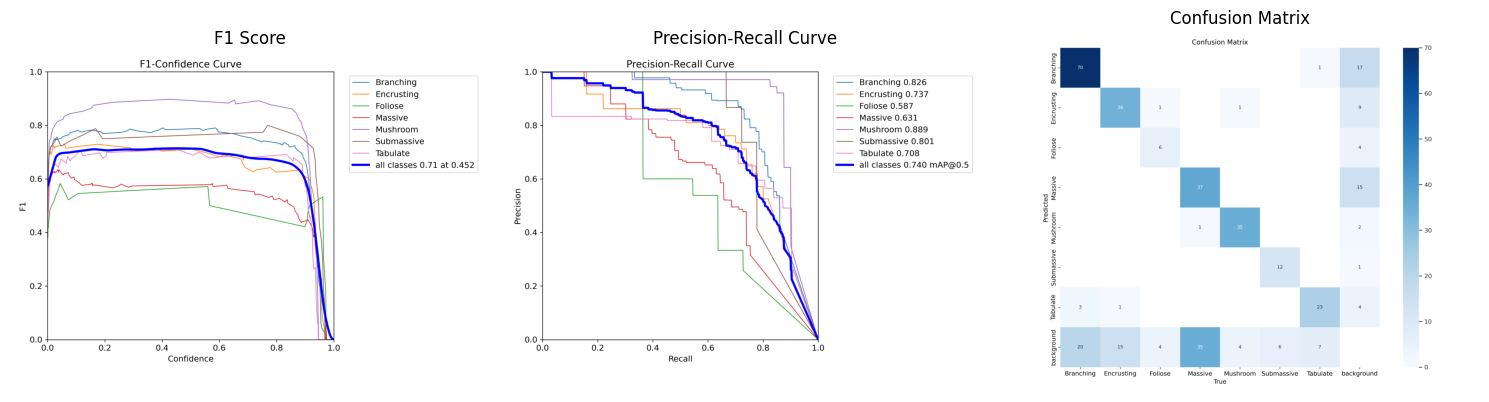

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the PNG images
f1_score_image = Image.open('/content/runs/detect/train/F1_curve.png')
precision_recall_curve_image = Image.open('/content/runs/detect/train/PR_curve.png')
confusion_matrix_image = Image.open('/content/runs/detect/train/confusion_matrix.png')

# Create a figure with multiple subplots
plt.figure(figsize=(15, 5))

# Add the F1 score subplot
plt.subplot(1, 3, 1)
plt.imshow(f1_score_image)
plt.title('F1 Score')
plt.axis('off')

# Add the Precision-Recall curve subplot
plt.subplot(1, 3, 2)
plt.imshow(precision_recall_curve_image)
plt.title('Precision-Recall Curve')
plt.axis('off')

# Add the confusion matrix subplot
plt.subplot(1, 3, 3)
plt.imshow(confusion_matrix_image)
plt.title('Confusion Matrix')
plt.axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

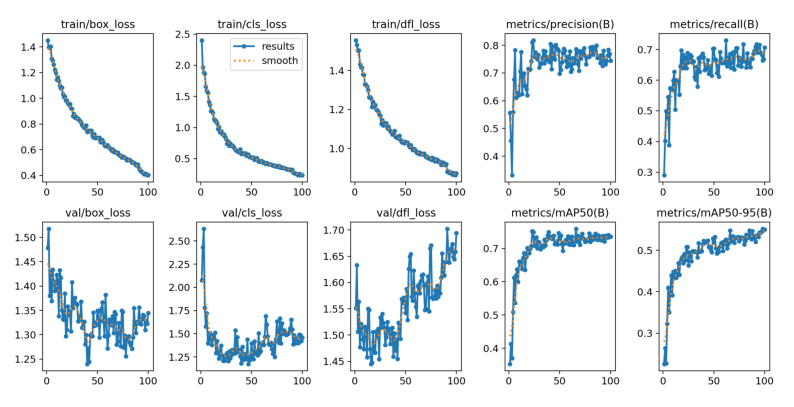

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the combined image
result_image = Image.open('/content/runs/detect/train/results.png')

# Display the combined image
plt.figure(figsize=(10, 8))
plt.imshow(result_image)
plt.axis('off')
plt.show()


In [ ]:
print(metrics.box.map)    # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)   # a list contains map50-95 of each category

0.5497741453977624
0.7401981212893105
0.6335640624339147
[    0.58274     0.52373     0.50084     0.44526     0.68179     0.62776      0.4863]


In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
from ultralytics import YOLO

# Open an image using PIL
source = Image.open('/content/test/images/LINIFoundation-ABZU-coralforms-latc-11_jpg.rf.a917bf401fd732b05242c05c6f4d3748.jpg')

# Run inference on the source
results = best_model(source, save=True)  # list of Results objects


0: 384x640 1 Branching, 3 Tabulates, 202.6ms
Speed: 1.3ms preprocess, 202.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


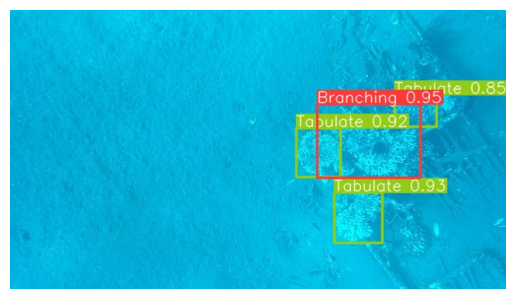

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the prediction image using PIL
prediction_image = Image.open('/content/runs/detect/predict/LINIFoundation-ABZU-coralforms-latc-11_jpg.rf.a917bf401fd732b05242c05c6f4d3748.jpg')

# Display the prediction image using Matplotlib
plt.imshow(prediction_image)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
from ultralytics import YOLO

# Open an image using PIL
source2 = Image.open('/content/test/images/LINIFoundation-ABZU-coralforms-les2-306_jpg.rf.89d1d657773febf9947832beda98e3d8.jpg')

# Run inference on the source
results2 = best_model(source2, save=True)  # list of Results objects


0: 384x640 1 Branching, 2 Massives, 68.0ms
Speed: 1.2ms preprocess, 68.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


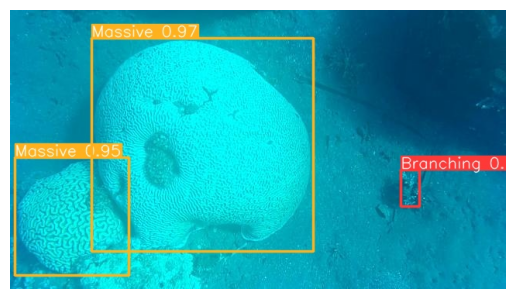

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the prediction image using PIL
prediction_image = Image.open('/content/runs/detect/predict/LINIFoundation-ABZU-coralforms-les2-306_jpg.rf.89d1d657773febf9947832beda98e3d8.jpg')

# Display the prediction image using Matplotlib
plt.imshow(prediction_image)
plt.axis('off')  # Turn off axis
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Source and destination paths
source_path = '/content/runs'
destination_path = '/content/drive/My Drive/final_project_yolov3'

# Copy the folder from source to destination
shutil.copytree(source_path, destination_path)

'/content/drive/My Drive/final_project_yolov3'